
# <center>Estudio emisiones de CO2</center>
# <center>con distintos algoritmos de regresion</center>

<a name="id8"></a>
**Índice**   
1. [Regresión Lineal](#id1)
2. [KNN](#id2)
3. [Arbol de decisión](#id3)
4. [SVM](#id4)
5. [Random Forest](#id5)
6. [XGBoost](#id6)
7. [RESUMEN FINAL](#id7)

Carguemos las librerías necesarias

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression, SGDRegressor

In [95]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split,ParameterGrid
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score



<h2 id="Acerca del set de datos">Acerca del set de datos</h2>

### `FuelConsumption.csv`:
Hemos descargado un conjunto de datos de consumo de combustible, **`FuelConsumption.csv`**, que contiene las clasificaciones de consumo de combustible específicas de cada modelo y las emisiones estimadas de dióxido de carbono de los vehículos ligeros nuevos para su venta al por menor en Canadá. [Fuente del conjunto de datos] (http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [96]:
df = pd.read_csv("~/Desktop/MLandPython/dataset archive/FuelConsumptionCo2.csv")

# Dale un vistazo al conjunto de datos
print(df.shape)
df[0:5]

(1067, 13)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Visualización de Datos y Análisis 



/Users/robertosanzgarcia/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'MODELYEAR'}>,
        <AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_MPG'}>,
        <AxesSubplot:title={'center':'CO2EMISSIONS'}>, <AxesSubplot:>]],
      dtype=object)

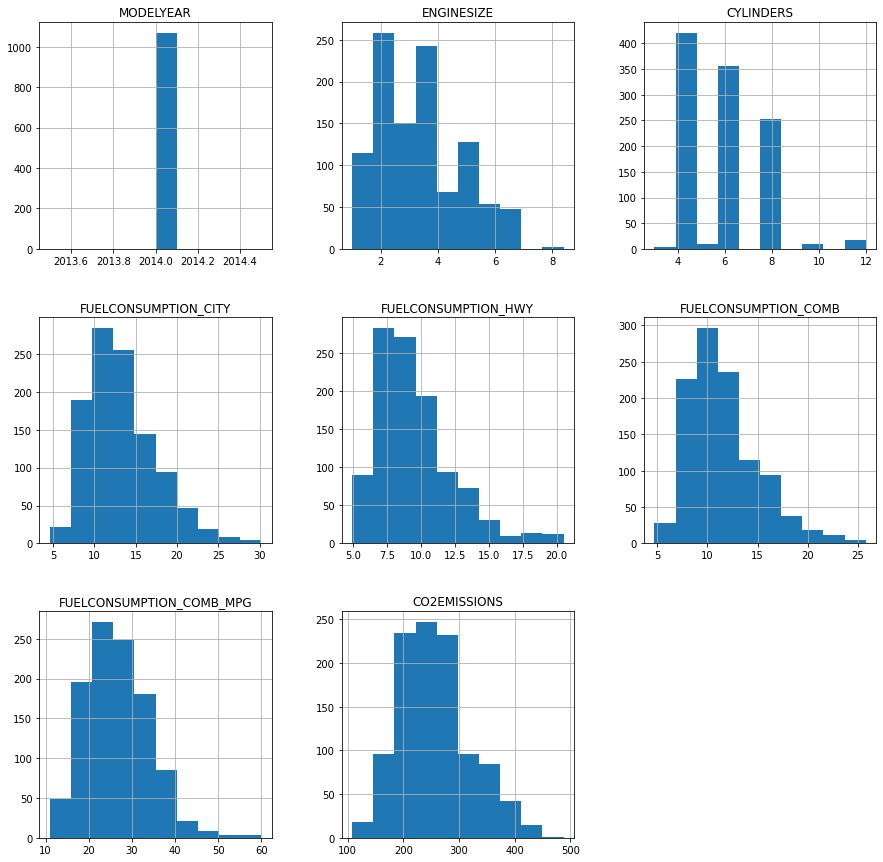

In [97]:
# Variables numericas y categoricas

# Esto imprime todos los histogramas de las columnas a la vez, con el parámetro figsize he controlado el tamaño
df.hist(figsize=(15, 15))


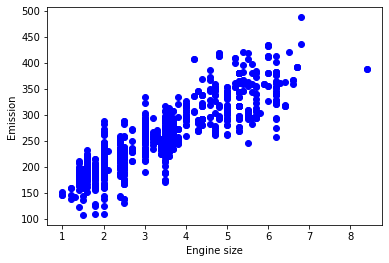

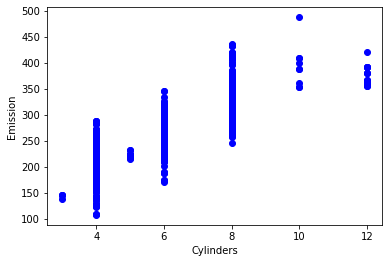

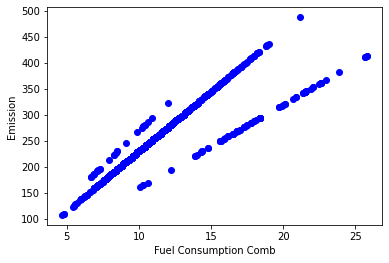

In [98]:
# También puedo ver cada variable indep con respecto a la var dep o target

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("Emission")
plt.show()

In [99]:
# Miramos primero el tipo de dato de las columnas
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

# Pre-procesamiento

Utilizando <b>df</b> como los datos de panda el archivo FuelConsumptionCo2.csv, declara las siguientes variables: <br>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (datos de df) </li>
    <li> <b> y </b> como el <b> vector de respuesta </b> (target) </li>
  
</ul>

In [100]:
#Elijo las variables que voy a emplear para entrenar el modelo
vars_indep = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
#vars_indep = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']

X = np.asarray(df[vars_indep])

# Extraigo la variable dependiente/target, que asumo que es la ultima columna
y_label = df.columns[-1]
y = df[y_label]
y_label

'CO2EMISSIONS'

## Normalizar los Datos 

La estandarización de Datos brinda a los datos cero media y varianza de unidad, es buena práctica, especialmente para algoritmos tales como KNN el cual se basa en distancia de casos:

In [101]:
# #Elijo si normalizo o no los datos según el algoritmo de clasificación
# X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# X[0:5]

## Train Test Split  

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)
y_test[0:5]

Set de Entrenamiento: (853, 3) (853,)
Set de Prueba: (214, 3) (214,)


531     269
689     292
404     165
1049    184
1043    198
Name: CO2EMISSIONS, dtype: int64

# Modelos de predicción

<a name="id1"></a> 
## Modelo de regresión lineal

In [103]:
# Modelo de regresion lineal, OLS supongo, con ecuacion normal supongo
regr = LinearRegression()

## No voy a entrenarlo con todos los datos
# X = np.asanyarray(df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
# y = np.asanyarray(df[['CO2EMISSIONS']])
# regr.fit (X, y)
regr.fit(X_train, y_train)

# The coefficients
print ('Intercept:',regr.intercept_,'Coefficients: ', regr.coef_)

#Parece que la R2 que saldria con todos los datos es esta
print('R2 score con todos los datos:',regr.score(X,y))

# Prediccion con los datos seleccionados de entrenamiento
y_pred= regr.predict(X_train)
y_hat = regr.predict(X_test)
regr_acc_train = r2_score(y_train, y_pred)
regr_acc_test = r2_score(y_test, y_hat)
print('R2 score de train:', regr_acc_train)
print('R2 score de test:', regr_acc_test)

Intercept: 62.174338123861276 Coefficients:  [ 9.71440651  7.75666556 10.11372285]
R2 score con todos los datos: 0.8636326636787273
R2 score de train: 0.8647921116907791
R2 score de test: 0.8588033701635215


## Modelo de regresión lineal con SGD

In [104]:
# Modelo de regresion lineal con Stochastic Gradient Descent
sgd_model = SGDRegressor()

## No voy a entrenarlo con todos los datos
# X = np.asanyarray(df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
# y = np.asanyarray(df[['CO2EMISSIONS']])
# sgd_model.fit (X, y)
sgd_model.fit(X_train, y_train)

# The coefficients
print ('Intercept:',sgd_model.intercept_,'Coefficients: ', sgd_model.coef_)

# Predccion con los mismos datos
y_pred= sgd_model.predict(X_train)
y_hat2 = sgd_model.predict(X_test)
regrSGD_acc_train = r2_score(y_train, y_pred)
regrSGD_acc_test = r2_score(y_test, y_hat2)
print('R2 score de train:',regrSGD_acc_train)
print('R2 score de test:',regrSGD_acc_test)

Intercept: [40.40687907] Coefficients:  [ 1.98740126 13.00216329 10.56087738]
R2 score de train: 0.8251205245501033
R2 score de test: 0.8327951529179044



**VISUALIZACION**

Comparo la predicción de regresión lineal normal (1º plot) con la SGD (2º plot)

Si se tapan los puntos azules con los negros o con los azules es que la predicción es exacta


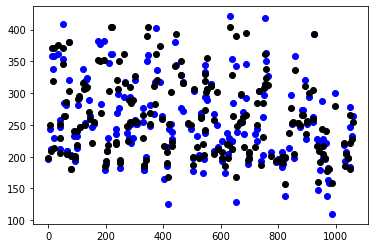

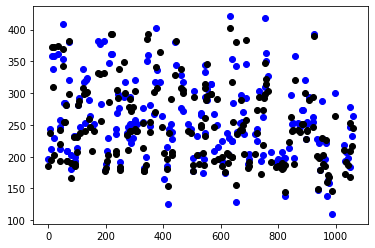

In [105]:
# Plot de la Y original con la predicha por reegresion lineal normal o la SGD
# Si se tapan los puntos rojos con los negros o con los azules es que la predicción es exacta
plt.scatter(y_test.index, y_test,  color='blue')
plt.scatter(y_test.index, y_hat,  color='black')
plt.show()
plt.scatter(y_test.index, y_test,  color='blue')
plt.scatter(y_test.index, y_hat2, color='black')
plt.show()


<a name="id2"></a> 
## KNN Regressor

### Directamente optimizo hiperparámetros

In [106]:
## Optimizo los hiperparámetros
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_neighbors' : list(range(3,21,2)),
                 'weights'     : ['uniform','distance'],
                 'algorithm'   : ['auto', 'ball_tree', 'kd_tree', 'brute']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'accuracy': []}

for params in param_grid:
    
    modelo = KNeighborsRegressor(        
                ** params
             )
    
    modelo.fit(X_train, y_train)
    y_hat3= modelo.predict(X_test)
    
    resultados['params'].append(params)
    resultados['accuracy'].append(r2_score(y_test,y_hat3))
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(7)

Modelo: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'uniform'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'distance'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'} ✓
Modelo: {'algorithm': 'auto', 'n_neighbors': 15, 'wei

,accuracy,algorithm,n_neighbors,weights
27,0.960021,ball_tree,11,distance
45,0.960021,kd_tree,11,distance
9,0.960021,auto,11,distance
63,0.959543,brute,11,distance
61,0.959482,brute,9,distance
43,0.959471,kd_tree,9,distance
7,0.959471,auto,9,distance


### Creo, entreno y evalúo el modelo con los mejores hiperparámetros

In [107]:
#Creo el modelo y lo entreno con X e Y train
resultados = resultados.reset_index(drop=True)
knn_model = KNeighborsRegressor(algorithm = resultados.at[0,'algorithm'],
                                n_neighbors = resultados.at[0,'n_neighbors'],
                                weights = resultados.at[0,'weights'])
knn_model.fit(X_train,y_train)

#Hago predicción con X_test y lo comparo con y_test
y_pred= knn_model.predict(X_train)
y_hat3 = knn_model.predict(X_test)
  
#print('Parametros del mejor arbol: ',resultados.at[0,'criterion'],resultados.at[0,'max_depth'],resultados.at[0,'max_features'])    
knn_acc_train = r2_score(y_train, y_pred)
knn_acc_test = r2_score(y_test, y_hat3)
print('R2 score de train:', knn_acc_train)
print('R2 score de test:', knn_acc_test)
knn_model

R2 score de train: 0.9960559054348577
R2 score de test: 0.9600209626972516


KNeighborsRegressor(algorithm='ball_tree', n_neighbors=11, weights='distance')


**VISUALIZACION**

Comparo la predicción de regresión lineal normal (1º plot) con la KNN (2º plot)

Si se tapan los puntos azules con los negros es que la predicción es exacta


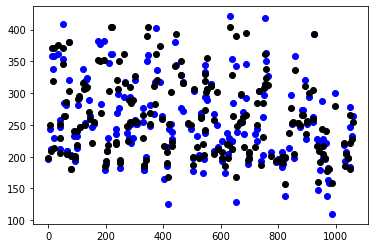

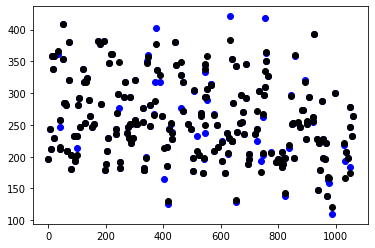

In [108]:
# Plot de la Y original con la predicha
# El primero es el plot de LinearRgressor, la prediccion en negro va encima del dato real en azul
plt.scatter(y_test.index, y_test,  color='blue'), 
plt.scatter(y_test.index, y_hat,  color='black')
plt.show()
# El segundo es el KNNRegressor, cuanto menos azul se vea mejor, más precisión
plt.scatter(y_test.index, y_test,  color='blue'), 
plt.scatter(y_test.index, y_hat3,  color='black')
plt.show()


<a name="id3"></a> 
## Decision Tree Regressor

### Directamente optimizo hiperparámetros

In [109]:
## Optimizo los hiperparámetros
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'max_features': ['auto','sqrt','log2'],
                 'criterion'   : [ 'mse','mae']
                }
           )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'accuracy': []}

for params in param_grid:
    
    modelo = DecisionTreeRegressor(
               random_state = 123,
                ** params
              )
    
    modelo.fit(X_train, y_train)
    y_hat4= modelo.predict(X_test)
    
    resultados['params'].append(params)
    resultados['accuracy'].append(r2_score(y_test,y_hat4))
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(7)

Modelo: {'criterion': 'mse', 'max_features': 'auto'} ✓
Modelo: {'criterion': 'mse', 'max_features': 'sqrt'} ✓
Modelo: {'criterion': 'mse', 'max_features': 'log2'} ✓
Modelo: {'criterion': 'mae', 'max_features': 'auto'} ✓
Modelo: {'criterion': 'mae', 'max_features': 'sqrt'} ✓
Modelo: {'criterion': 'mae', 'max_features': 'log2'} ✓


,accuracy,criterion,max_features
0,0.961065,mse,auto
4,0.954661,mae,sqrt
5,0.954661,mae,log2
1,0.916424,mse,sqrt
2,0.916424,mse,log2
3,0.905426,mae,auto


### Creo, entreno y evalúo el modelo con los mejores hiperparámetros

In [110]:
#Creo el modelo y lo entreno con X e Y train
resultados = resultados.reset_index(drop=True)
dt_model = DecisionTreeRegressor(max_features= resultados.at[0,'max_features'],
                                 criterion   = resultados.at[0,'criterion'])
dt_model.fit(X_train,y_train)

#Hago predicción con X_test y lo comparo con y_test
y_pred= dt_model.predict(X_train)
y_hat4 = dt_model.predict(X_test)
  
#print('Parametros del mejor arbol: ',resultados.at[0,'criterion'],resultados.at[0,'max_depth'],resultados.at[0,'max_features'])    
dt_acc_train = r2_score(y_train, y_pred)
dt_acc_test = r2_score(y_test, y_hat4)
print('R2 score de train:',dt_acc_train)
print('R2 score de test:',dt_acc_test)
dt_model

R2 score de train: 0.9960559054348577
R2 score de test: 0.9611139594512716


DecisionTreeRegressor(max_features='auto')

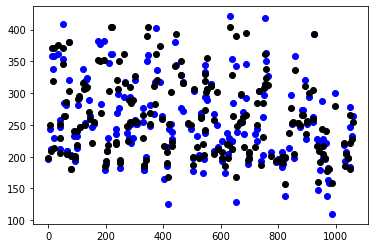

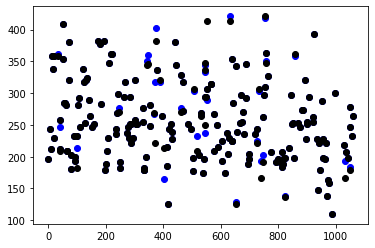

In [111]:
# Plot de la Y original con la predicha
# El primero es el plot de LinearRgressor, la prediccion en negro va encima del dato real en azul
plt.scatter(y_test.index, y_test,  color='blue'), 
plt.scatter(y_test.index, y_hat,  color='black')
plt.show()
# El segundo es el DecisionTreeRegressor, cuanto menos azul se vea mejor, más precisión
plt.scatter(y_test.index, y_test,  color='blue'), 
plt.scatter(y_test.index, y_hat4,  color='black')
plt.show()


In [112]:
importancia_predictores = pd.DataFrame(
                            {'predictor': vars_indep,
                             'importancia': dt_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,FUELCONSUMPTION_COMB,0.891088
1,CYLINDERS,0.089364
0,ENGINESIZE,0.019548


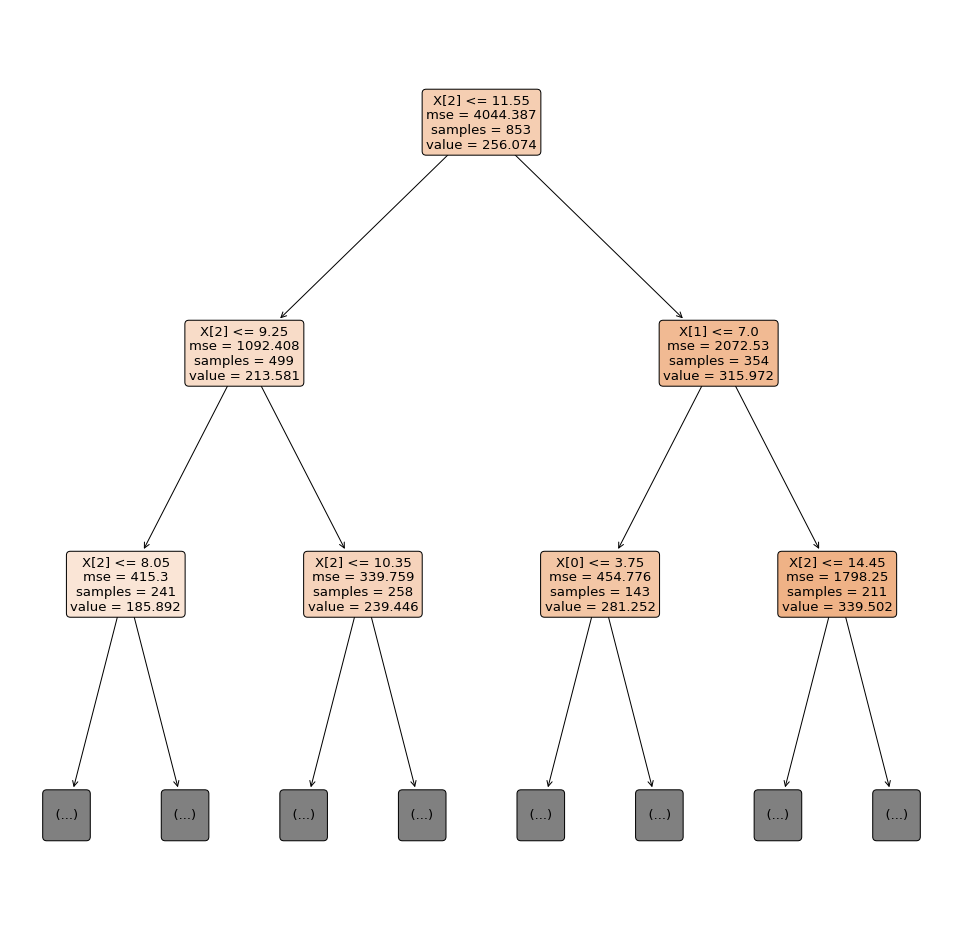

In [113]:
#Preparo las etiquetas del arbol
featureNames = vars_indep
# Aqui no hay clases en la var dep
#targetNames = sorted(df[y_label].unique().astype('str'))

#Esto pinta bien el arbol, hay que poner antes el tamaño de la figura, sino lo hace muy pequeño
plt.figure(figsize=(17, 17))
plot_tree(dt_model, max_depth=2,filled=True, rounded=True)
plt.show()

<a name="id4"></a> 
## Support Vector Machine SVM Regressor

### Directamente optimizo hiperparámetros

In [114]:
## Optimizo los hiperparámetros
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                        {'kernel': ['linear','poly','rbf'],
                         'C'   : [ 0.1, 1, 100]
                        }
                       )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'accuracy': []}

for params in param_grid:
    
    modelo = SVR(
                gamma='scale',
                ** params
              )
    
    modelo.fit(X_train, y_train)
    y_hat5= modelo.predict(X_test)
    
    resultados['params'].append(params)
    resultados['accuracy'].append(r2_score(y_test,y_hat5))
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(7)

Modelo: {'C': 0.1, 'kernel': 'linear'} ✓
Modelo: {'C': 0.1, 'kernel': 'poly'} ✓
Modelo: {'C': 0.1, 'kernel': 'rbf'} ✓
Modelo: {'C': 1, 'kernel': 'linear'} ✓
Modelo: {'C': 1, 'kernel': 'poly'} ✓
Modelo: {'C': 1, 'kernel': 'rbf'} ✓
Modelo: {'C': 100, 'kernel': 'linear'} ✓
Modelo: {'C': 100, 'kernel': 'poly'} ✓
Modelo: {'C': 100, 'kernel': 'rbf'} ✓


,accuracy,C,kernel
8,0.892624,100.0,rbf
5,0.812389,1.0,rbf
7,0.746928,100.0,poly
4,0.744307,1.0,poly
1,0.627798,0.1,poly
0,0.562872,0.1,linear
3,0.555029,1.0,linear


### Creo, entreno y evalúo el modelo con los mejores hiperparámetros

In [115]:
#Creo el modelo y lo entreno con X e Y train
resultados = resultados.reset_index(drop=True)
svm_model = SVR(gamma   = 'scale',
                kernel= resultados.at[0,'kernel'],
                C = resultados.at[0,'C'])
svm_model.fit(X_train,y_train)

#Hago predicción con X_test y lo comparo con y_test
y_pred= svm_model.predict(X_train)
y_hat5 = svm_model.predict(X_test)
  
#print('Parametros del mejor arbol: ',resultados.at[0,'criterion'],resultados.at[0,'max_depth'],resultados.at[0,'max_features'])    
svm_acc_train = r2_score(y_train, y_pred)
svm_acc_test = r2_score(y_test, y_hat5)
print('R2 score de train:',svm_acc_train)
print('R2 score de test:',svm_acc_test)
svm_model

R2 score de train: 0.922938436287082
R2 score de test: 0.8926242897142473


SVR(C=100.0)

In [116]:
#No visualizo, es peor

<a name="id5"></a> 
## Random Forest Regressor

### Directamente optimizo hiperparámetros

In [117]:
## Optimizo los hiperparámetros
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [10, 30, 100],
                 'max_features': ['auto','sqrt','log2'],
                 'max_depth'   : [3, 20, 50, 100],
                }
           )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'accuracy': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                ** params
              )
    
    modelo.fit(X_train, y_train)
    y_hat6= modelo.predict(X_test)
    
    resultados['params'].append(params)
    resultados['accuracy'].append(r2_score(y_test, y_hat6))
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(7)

Modelo: {'max_depth': 3, 'max_features': 'auto', 'n_estimators': 10} ✓
Modelo: {'max_depth': 3, 'max_features': 'auto', 'n_estimators': 30} ✓
Modelo: {'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100} ✓
Modelo: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 10} ✓
Modelo: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 30} ✓
Modelo: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100} ✓
Modelo: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10} ✓
Modelo: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 30} ✓
Modelo: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100} ✓
Modelo: {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 10} ✓
Modelo: {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 30} ✓
Modelo: {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 100} ✓
Modelo: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 10} ✓
Modelo: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 30}

,accuracy,max_depth,max_features,n_estimators
30,0.986154,100,sqrt,10
15,0.984141,20,log2,10
13,0.982609,20,sqrt,30
12,0.982580,20,sqrt,10
25,0.981867,50,log2,30
23,0.981823,50,sqrt,100
32,0.981629,100,sqrt,100


### Creo, entreno y evalúo el modelo con los mejores hiperparámetros

In [118]:
#Creo el modelo y lo entreno con X e Y train
resultados = resultados.reset_index(drop=True)
rf_model = RandomForestRegressor(n_estimators= resultados.at[0,'n_estimators'],
                                 max_features= resultados.at[0,'max_features'],
                                 max_depth   = resultados.at[0,'max_depth'])
rf_model.fit(X_train,y_train)

#Hago predicción con X_test y lo comparo con y_test
y_pred= rf_model.predict(X_train)
y_hat6 = rf_model.predict(X_test)
  
#print('Parametros del mejor arbol: ',resultados.at[0,'criterion'],resultados.at[0,'max_depth'],resultados.at[0,'max_features'])    
rf_acc_train = r2_score(y_train, y_pred)
rf_acc_test = r2_score(y_test, y_hat6)
print('R2 score de train:',rf_acc_train)
print('R2 score de test:',rf_acc_test)
rf_model

R2 score de train: 0.9918048196129081
R2 score de test: 0.9787560275782635


RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=10)

In [119]:
importancia_predictores = pd.DataFrame(
                            {'predictor': vars_indep,
                             'importancia': dt_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,FUELCONSUMPTION_COMB,0.891088
1,CYLINDERS,0.089364
0,ENGINESIZE,0.019548


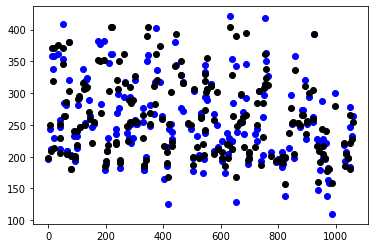

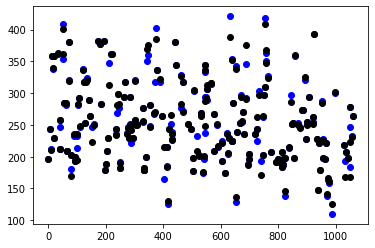

In [120]:
# Plot de la Y original con la predicha
# El primero es el plot de LinearRgressor, la prediccion en negro va encima del dato real en azul
plt.scatter(y_test.index, y_test,  color='blue'), 
plt.scatter(y_test.index, y_hat,  color='black')
plt.show()
# El segundo es el DecisionTreeRegressor, cuanto menos azul se vea mejor, más precisión
plt.scatter(y_test.index, y_test,  color='blue'), 
plt.scatter(y_test.index, y_hat6,  color='black')
plt.show()


<a name="id6"></a>
## XGBoost Regressor

### Directamente optimizo hiperparámetros

In [121]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [100, 500, 1000],
                 'learning_rate': [0.01, 0.05, 0.1],
                 'max_depth'   : [3, 7, 20],
                 'gamma' : [0.1, 0.2]
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'accuracy': []}

for params in param_grid:
    
    xgb_model = XGBRegressor(
                use_label_encoder=False,
                verbosity=0,
                ** params
             )
    
    xgb_model.fit(X_train, y_train)
    yhat7= xgb_model.predict(X_test)
    
    resultados['params'].append(params)
    resultados['accuracy'].append(r2_score(y_test,yhat7))
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados = resultados.reset_index(drop=True)
resultados.head(7)

Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 100} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 500} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 1000} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 

,accuracy,gamma,learning_rate,max_depth,n_estimators
0,0.968115,0.1,0.01,7.0,500.0
1,0.967739,0.2,0.01,7.0,500.0
2,0.967434,0.1,0.01,7.0,1000.0
3,0.966049,0.1,0.10,7.0,1000.0
4,0.966049,0.1,0.10,7.0,500.0
5,0.965917,0.2,0.01,7.0,1000.0
6,0.965771,0.1,0.10,7.0,100.0


### Creo, entreno y evalúo el modelo con los mejores hiperparámetros

In [122]:
#Creo el modelo y lo entreno con X e Y train
xgb_model = XGBRegressor(use_label_encoder=False,
                          n_estimators = resultados.at[0,'n_estimators'].astype('int'),
                          learning_rate = resultados.at[0,'learning_rate'],
                          max_depth = resultados.at[0,'max_depth'].astype('int'),
                          gamma = resultados.at[0,'gamma'])

xgb_model.fit(X_train, y_train)

ypred = xgb_model.predict(X_train)
y_hat7 = xgb_model.predict(X_test)

xgb_acc_train = r2_score(y_train, y_pred)
xgb_acc_test = r2_score(y_test, y_hat7)
print("Precisión del Arbol de entrenamiento: ", xgb_acc_train)
print("Precisión del Arbol de test: ", xgb_acc_test)
xgb_model

Precisión del Arbol de entrenamiento:  0.9918048196129081
Precisión del Arbol de test:  0.968115116794485


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

In [123]:
importancia_predictores = pd.DataFrame(
                            {'predictor': vars_indep,
                             'importancia': xgb_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,FUELCONSUMPTION_COMB,0.563055
1,CYLINDERS,0.366448
0,ENGINESIZE,0.070497


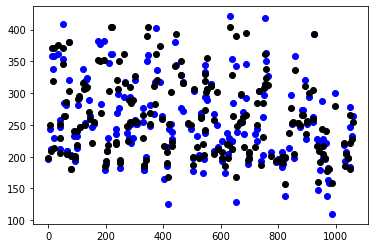

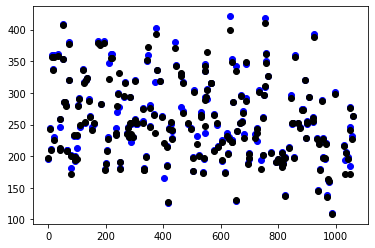

In [124]:
# Plot de la Y original con la predicha
# El primero es el plot de LinearRgressor, la prediccion en negro va encima del dato real en azul
plt.scatter(y_test.index, y_test,  color='blue'), 
plt.scatter(y_test.index, y_hat,  color='black')
plt.show()
# El segundo es el DecisionTreeRegressor, cuanto menos azul se vea mejor, más precisión
plt.scatter(y_test.index, y_test,  color='blue'), 
plt.scatter(y_test.index, y_hat7,  color='black')
plt.show()


<a name="id7"></a>
## RESUMEN FINAL

Este es el resumen de resultados con cada algoritmo

In [125]:
Resultado_total = pd.DataFrame(
            {'Algoritmo':('Regresión Lineal','SGD para Reg. Lineal','KNN','Decision Tree','SVM','Random Forest','XGBoost'),
             'Precisión Entrenam':(regr_acc_train, regrSGD_acc_train, knn_acc_train, dt_acc_train, svm_acc_train, rf_acc_train, xgb_acc_train),
             'Precisión Test':(regr_acc_test, regrSGD_acc_test, knn_acc_test, dt_acc_test, svm_acc_test, rf_acc_test, xgb_acc_test),             
            })
Resultado_total.sort_values('Precisión Test', ascending=False)

,Algoritmo,Precisión Entrenam,Precisión Test
5,Random Forest,0.991805,0.978756
6,XGBoost,0.991805,0.968115
3,Decision Tree,0.996056,0.961114
2,KNN,0.996056,0.960021
4,SVM,0.922938,0.892624
0,Regresión Lineal,0.864792,0.858803
1,SGD para Reg. Lineal,0.825121,0.832795


[Retorno al principio](#id8)